In [3]:
import pandas as pd
import pickle
import os 

pd.set_option('display.max_rows',10000)
pd.set_option('display.min_rows',2000)
pd.set_option('display.column_space',30)
pd.set_option('display.max_colwidth',150)
pd.set_option('display.expand_frame_repr',True)

_end_dates    = pd.Series(pd.date_range(start="2020-10-08", end="2021-03-31", freq="D", tz='America/New_York'))
_start_dates  = _end_dates - pd.Timedelta(days=7)
_center_dates = _end_dates - pd.Timedelta(days=3.5)
end_dates     = _end_dates.apply(lambda x: x.timestamp())
center_dates  = _center_dates.apply(lambda x: x.timestamp())
start_dates   = _start_dates.apply(lambda x: x.timestamp())
_end_dates    = _end_dates.apply(lambda x:str(x).split(' ')[0])
_center_dates = _center_dates.apply(lambda x:str(x).split(' ')[0])
_start_dates  = _start_dates.apply(lambda x:str(x).split(' ')[0])

id_l = '/home/casonk/path/mmani_root/mmani0/shared_data/hot/push_file/IDL/'

j=1
k=21

In [20]:
def avg_match(r):
    with open((id_l + ('/UTIL/OLAP_{}_{}_{}.pkl').format(j, k, r)), 'rb') as olh:
        olap = pickle.load(olh)
    
    df = pd.DataFrame(index=_center_dates, columns=['succ_mapped'])
    df['succ_mapped'] = 0

    for date in _center_dates:
        df['succ_mapped'] += pd.DataFrame(olap[date]).apply(lambda col: len(col.unique()))

    df = df['succ_mapped'] / len(_center_dates)
    return df

In [15]:
r_05 = avg_match(0.5)
r_1 = avg_match(1)
r_2 = avg_match(2)

In [7]:
import matplotlib.pyplot as plt

(0.0, 1.0)

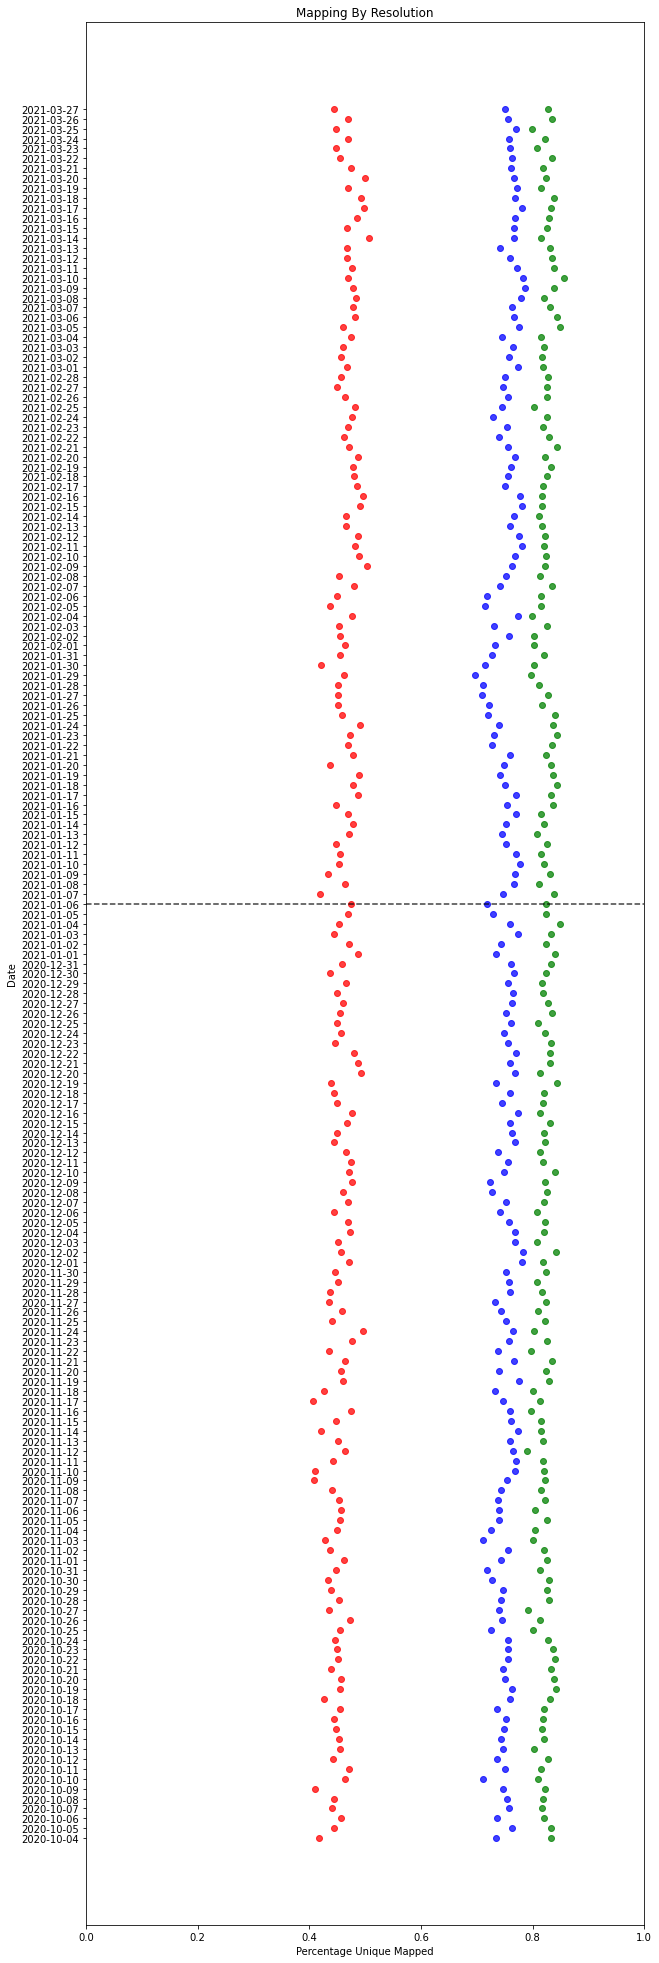

In [33]:
fig = plt.figure(figsize=(10, 35))
plt.scatter(x=r_05 / 75, y=r_05.index.to_list(), alpha=0.75, c='r')
plt.scatter(x=r_1 / 75, y=r_05.index.to_list(), alpha=0.75, c='b')
plt.scatter(x=r_2 / 75, y=r_05.index.to_list(), alpha=0.75, c='g')
plt.plot([0,1], ['2021-01-06','2021-01-06'], alpha=0.75, c='black', ls='--')

plt.title('Mapping By Resolution')
plt.xlabel('Percentage Unique Mapped')
plt.ylabel('Date')
plt.xlim(0,1)

In [1]:
def tru_match(r):
    with open((id_l + ('/UTIL/OLAP_{}_{}_{}.pkl').format(j, k, r)), 'rb') as olh:
        olap = pickle.load(olh)
    
    idx = []
    nmp = []

    for i in range(len(_center_dates) - 1):
        idx += [_center_dates[i + 1]]
        nmp += [pd.DataFrame(olap[_center_dates[i]]).apply(lambda col: len(col.unique())).loc[_center_dates[i + 1]]]

    return (idx,nmp)

In [4]:
rt_05 = tru_match(0.5)
rt_1 = tru_match(1)
rt_2 = tru_match(2)

(0.0, 75.0)

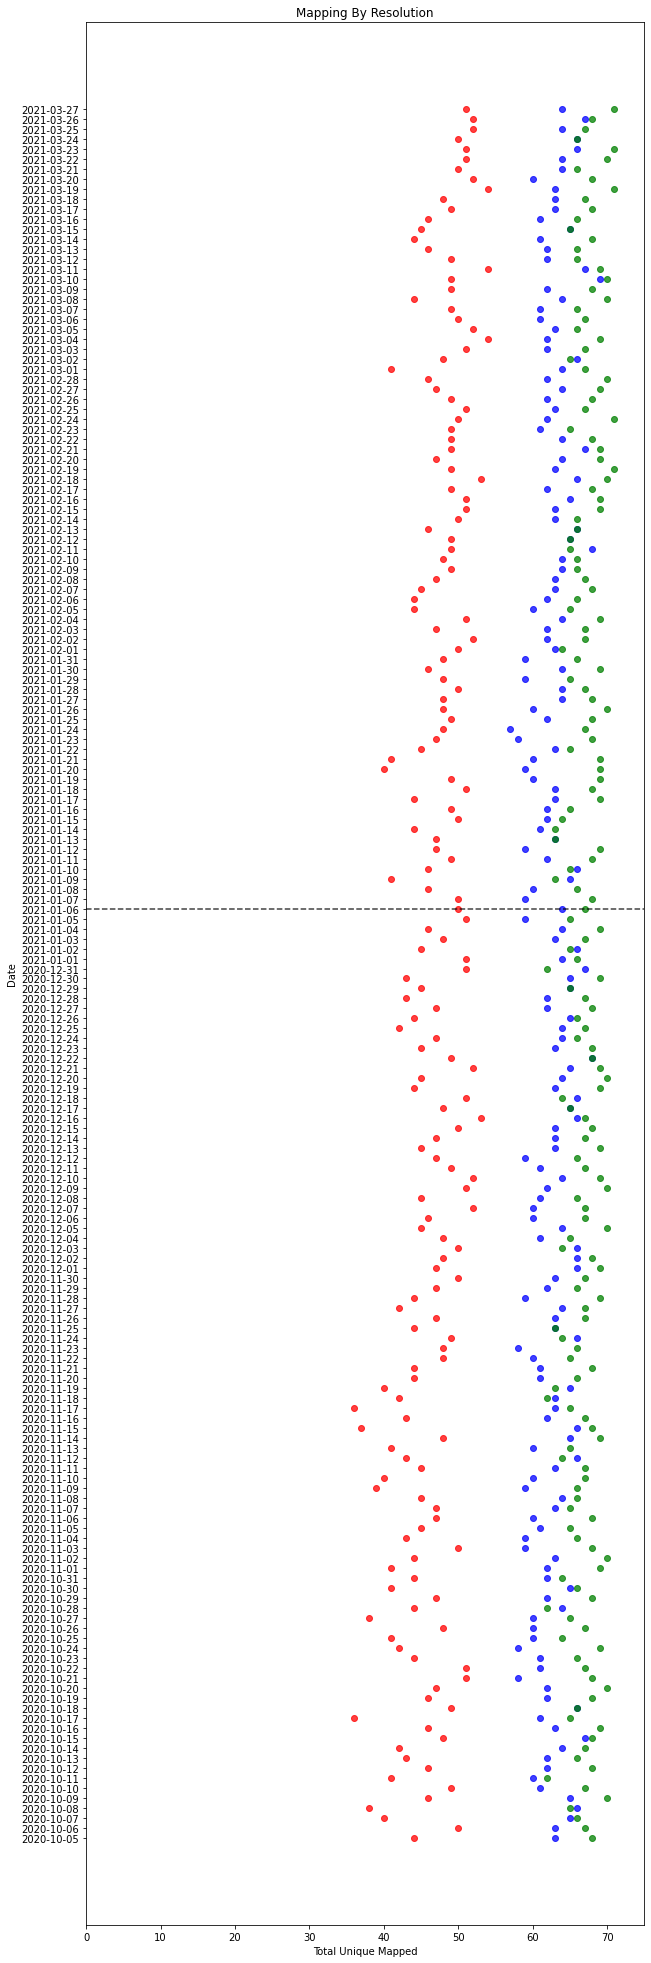

In [15]:
fig = plt.figure(figsize=(10, 35))
plt.scatter(x=rt_05[1] , y=rt_05[0], alpha=0.75, c='r')
plt.scatter(x=rt_1[1]  ,  y=rt_05[0], alpha=0.75, c='b')
plt.scatter(x=rt_2[1]  ,  y=rt_05[0], alpha=0.75, c='g')
plt.plot([0,75], ['2021-01-06','2021-01-06'], alpha=0.75, c='black', ls='--')

plt.title('Mapping By Resolution')
plt.xlabel('Total Unique Mapped')
plt.ylabel('Date')
plt.xlim(0,75)

In [31]:
def best_match(r):
    with open((id_l + ('/UTIL/OLAP_{}_{}_{}.pkl').format(j, k, r)), 'rb') as olh:
        olap = pickle.load(olh)
    
    df = pd.DataFrame(index=_center_dates)
    df['succ_mapped'] = 0
    df['best_date'] = 'na'

    for date1 in _center_dates:
        tmp_df = pd.DataFrame(olap[date1]).apply(lambda col: len(col.unique()))
        for date2 in _center_dates:
            if date1 == date2:
                continue
            if df.loc[date1, 'succ_mapped'] < tmp_df.loc[date2]:
                df.loc[date1, 'best_date'] = date2
                df.loc[date1, 'succ_mapped'] = tmp_df.loc[date2]

    return df

In [32]:
rb_05 = best_match(0.5)
rb_1  = best_match(1)
rb_2  = best_match(2)

(0.0, 1.0)

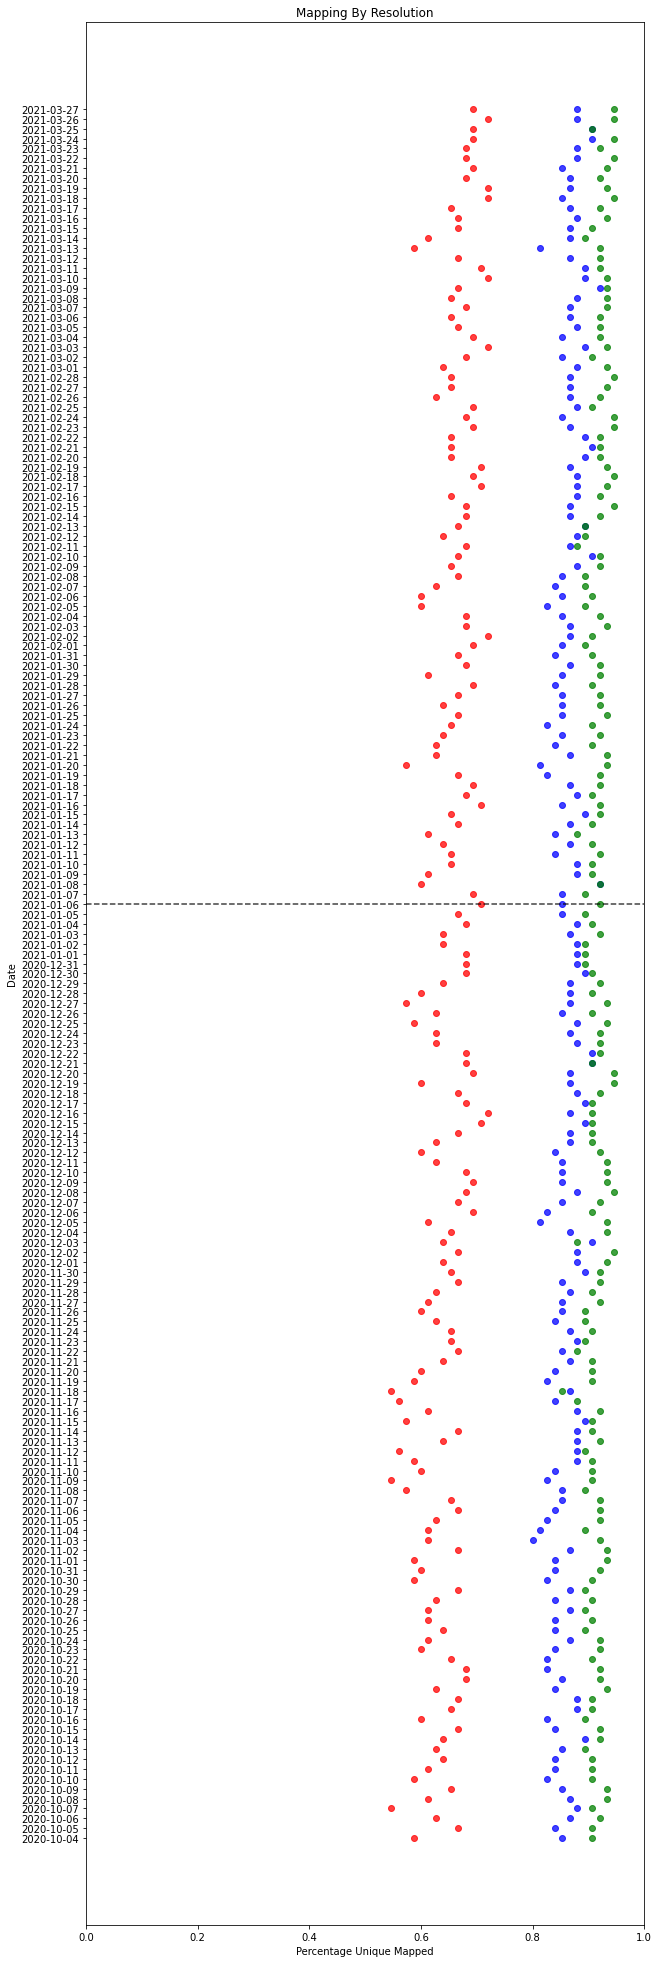

In [34]:
fig = plt.figure(figsize=(10, 35))
plt.scatter(x=rb_05['succ_mapped'] / 75, y=rb_05.index.to_list(), alpha=0.75, c='r')
plt.scatter(x=rb_1['succ_mapped']  / 75, y=rb_05.index.to_list(), alpha=0.75, c='b')
plt.scatter(x=rb_2['succ_mapped']  / 75, y=rb_05.index.to_list(), alpha=0.75, c='g')
plt.plot([0,1], ['2021-01-06','2021-01-06'], alpha=0.75, c='black', ls='--')

plt.title('Mapping By Resolution')
plt.xlabel('Percentage Unique Mapped')
plt.ylabel('Date')
plt.xlim(0,1)

In [33]:
rb_05

,succ_mapped,best_date
2020-10-04,44,2020-10-05
2020-10-05,50,2020-10-06
2020-10-06,47,2020-10-05
2020-10-07,41,2020-10-06
2020-10-08,46,2020-10-09
2020-10-09,49,2020-10-10
2020-10-10,44,2020-10-12
2020-10-11,46,2020-10-12
2020-10-12,48,2020-10-11
2020-10-13,47,2020-10-12
